In [33]:

"""
    t, y = myeulers(fun, a, b, n, y1)

Solve IVP y' = fun(t, y), a <= t <= b, y(a) = y1 using Euler's method.
Use the integration step h = (b - a)/(n - 1). Return a vector of values
of the independent variable t_i, and a matrix of correspondinig values
of the solution, y(t_i)
"""
function myeulersv(fun, a, b, n, y1)
    t = range(a, b, n)
neqs = length(y1)
    dydt = zeros(neqs) # allocate the vector of derivatives
    y = zeros(neqs, n) # allocate the matrix of solutions 
    h = t[2] - t[1]
    y[:, 1] = y1
    for i = 1:n-1
        k1 = h*fun(t[i], y[:, i])
        y[:, i+1] = y[:, i] + k1 # : specifies that it is a column 
    end
    return t, y
end

myeulersv

In [34]:

"""

    dydt = funv(t ,y)

Right hands side of the oscillator with friction
"""

function frict(t, y)
    dydt = zeros(2)
    dydt[1] = y[2]
    dydt[2] = -y[1] - y[2]
    return dydt 
end

frict (generic function with 1 method)

In [35]:

a = 0
b = 10
n = 100
y1= [1.0, 0.0]


2-element Vector{Float64}:
 1.0
 0.0

In [36]:

t, y = myeulersv(frict, a, b, n, y1)

(0.0:0.10101010101010101:10.0, [1.0 1.0 … -0.006372540748269553 -0.00682207512369449; 0.0 -0.10101010101010101 … -0.0044503903167068684 -0.00335716495660824])

In [37]:
using PyPlot

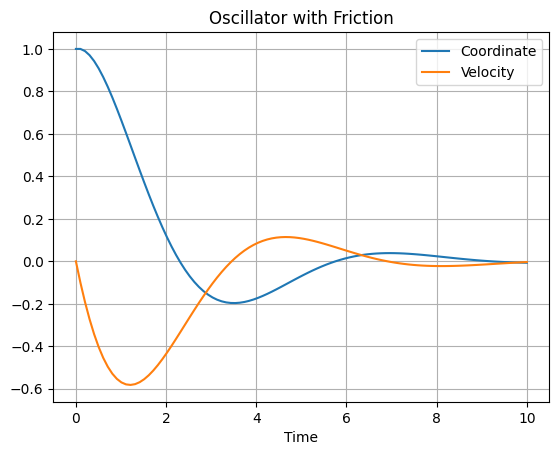

PyObject Text(0.5, 24.0, 'Time')

In [38]:

plot(t, y[1, :], label="Coordinate")
plot(t, y[2, :], label="Velocity")
grid(true)
title("Oscillator with Friction")
legend()
xlabel("Time")

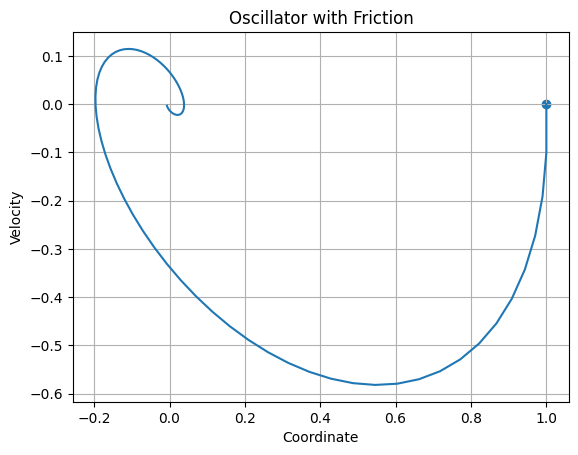

PyObject Text(24.000000000000007, 0.5, 'Velocity')

In [39]:

plot(y[1, :] , y[2, :])
grid(true)
scatter(y1...)
title("Oscillator with Friction")
xlabel("Coordinate")
ylabel("Velocity")

***Spherical Bessel Function ***

In [43]:

function bes(x, u)
    dudx = zeros(2)
    dudx[1] = u[2]
    dudx[2] = abs(x) > eps() ? -2/x * u[2] - (1 - 2/x^2) * u[1] : 0.0
    return dudx 
end 


bes (generic function with 1 method)

In [44]:

abes = 0.0 
bbes = 20 
nbes = 500 
u0bes  = [0.0, 1/3]

2-element Vector{Float64}:
 0.0
 0.3333333333333333

In [45]:

x, u = myeulersv(bes, abes, bbes, nbes, u0bes)

(0.0:0.04008016032064128:20.0, [0.0 0.01336005344021376 … -0.02410329895923382 -0.021395891326308834; 0.3333333333333333 0.3333333333333333 … 0.06754982044147842 0.06823975036979044])

In [55]:

j1exact(x) = abs(x) > eps() ? sin(x)/(x - cos(x)/x^2) : 0.0

j1exact (generic function with 1 method)

In [56]:

using PyPlot

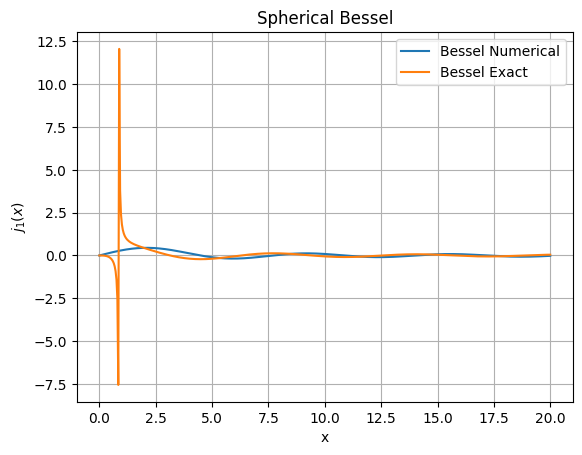

PyObject Text(0.5, 1.0, 'Spherical Bessel')

In [57]:

plot(x, u[1, :], label="Bessel Numerical")
plot(x, j1exact.(x), label="Bessel Exact")
grid(true)
xlabel("x")
ylabel(L"j_1(x)")
legend()
title("Spherical Bessel")